## Book Recomendation System

submitted by- Mayank Deopa

In [1]:
## Importing All Necessary Library
import pandas as pd
import numpy as np
## for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
## for interactive plots
import ipywidgets
from ipywidgets import interact
from ipywidgets import interact_manual
## For Ignoring Warning ErrorMessage
from warnings import filterwarnings
filterwarnings('ignore')

## Importing Datasets

In [2]:
 book= pd.read_csv("booker.csv", error_bad_lines = False)
 

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [3]:
book.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


## Dataset Description

* bookID: Unique identification number fro each book
* title: Name under which book was published
* authors: Name of the Authors of the book
* average_rating: Avarage rating of the book recevied in total.
* isbn: International standarded book number
* isbn13: 13 digit isbn to identify the book
* language_code: Primary Language of the book
* num_pages: Number of pages the book containes
* ratings_count: Total Number of ratings the book recevied.
* text_reviews_count: Total number of written reviews recevied.
* publication_date: Date when the book was first published
* publisher: Name of the Pulishers


## Checking All Column name present in Dataset


In [4]:
book.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

Let's get rid of the unnecessary columns

In [5]:
 book.drop(['bookID', 'isbn', 'isbn13'], axis = 1, inplace = True)

In [6]:
book.head()

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11/1/2003,Scholastic
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,9/13/2004,Scholastic


## Checking Row & Column Of Dataset


In [7]:
book.shape

(11123, 9)

## Checking All Columns Of the dataset

In [8]:
book.columns

Index(['title', 'authors', 'average_rating', 'language_code', '  num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher'],
      dtype='object')

## Removing Extra Spaces from All Column name if there are any


In [9]:
book.columns=book.columns.str.strip()

In [10]:
book.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher'],
      dtype='object')

## Checking DataTypes of All Columns.


In [11]:
book.dtypes

title                  object
authors                object
average_rating        float64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

## Checking Statistical Summary of all Numeric Columns

In [12]:
book.describe()

,average_rating,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000
mean,3.934075,336.405556,1.794285e+04,542.048099
std,0.350485,241.152626,1.124992e+05,2576.619589
min,0.000000,0.000000,0.000000e+00,0.000000
25%,3.770000,192.000000,1.040000e+02,9.000000
50%,3.960000,299.000000,7.450000e+02,47.000000
75%,4.140000,416.000000,5.000500e+03,238.000000
max,5.000000,6576.000000,4.597666e+06,94265.000000


## Checking Statistical Summary of all Categorical Columns

In [13]:
book.describe(include='object')

,title,authors,language_code,publication_date,publisher
count,11123,11123,11123,11123,11123
unique,10348,6639,27,3679,2290
top,The Iliad,Stephen King,eng,10/1/2005,Vintage
freq,9,40,8908,56,318


## Checking Sum of all Null value Present in the Dataset.


In [14]:
book.isnull().sum()

title                 0
authors               0
average_rating        0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [15]:
book.shape

(11123, 9)

In [16]:
# Just in case we case we encounter null value in dataset we will use following code 
#book=book.dropna(axis=0, how="any", thresh=None, subset=None, inplace=False)

we have succesfully removed all the null values from the dataset.

## Checking if any Duplicate Row Present In Dataset or Not

In [17]:
book.duplicated().any()

False

 So there are no duplicated value in the dataset.

## Checking Summary of Dataset

In [18]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               11123 non-null  object 
 1   authors             11123 non-null  object 
 2   average_rating      11123 non-null  float64
 3   language_code       11123 non-null  object 
 4   num_pages           11123 non-null  int64  
 5   ratings_count       11123 non-null  int64  
 6   text_reviews_count  11123 non-null  int64  
 7   publication_date    11123 non-null  object 
 8   publisher           11123 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 782.2+ KB


## Checking All Unique Rows Present in Title Columns


In [19]:
book.title.nunique()

10348

## Creating New Year Columns

In [20]:
book['year'] = book['publication_date'].str.split('/')
book['year'] = book['year'].apply(lambda x: x[2])

## Checking Datatypes for all Column name

In [21]:
book.dtypes

title                  object
authors                object
average_rating        float64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
year                   object
dtype: object

## Converting datatype of publication to Integer

In [22]:
book['year']=book['year'].astype(int)

In [23]:
book.dtypes

title                  object
authors                object
average_rating        float64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
year                    int32
dtype: object

## Checking the minimum year of publication

In [25]:
book['year].max()

SyntaxError: EOL while scanning string literal (3886010998.py, line 1)

## Exploratory Data Analysis

 ## Filter Year == 2022 and get required output based on input.


In [26]:
book[book['year']==2002][['title','authors','publisher']]

,title,authors,publisher
8,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,Del Rey Books
13,Bill Bryson's African Diary,Bill Bryson,Broadway Books
24,The Lord of the Rings (The Lord of the Rings ...,J.R.R. Tolkien/Alan Lee,Houghton Mifflin Harcourt
53,The Heidi Chronicles,Wendy Wasserstein,Dramatists Play Service
59,Heidi (Heidi #1-2),Johanna Spyri/Beverly Cleary/Angelo Rinaldi,Kingfisher
...,...,...,...
10955,Writing Secure Code,Michael Howard/David LeBlanc,Microsoft Press
11002,A Painted House,John Grisham,Arrow Books
11036,Love Hate and Everything in Between: Expressi...,Mamiko Murakami/Ernest Reiss,Kodansha
11041,After the Quake,Haruki Murakami/Jay Rubin,Alfred A. Knopf


## Creating Groupby function based on Year and Title column

In [27]:
book.groupby(['year'])['title'].agg('count').sort_values(ascending = False).head(20)
# Top ten year with most number of book titles

year
2006    1700
2005    1260
2004    1069
2003     931
2002     798
2001     656
2000     534
2007     518
1999     450
1998     396
1997     290
1996     250
1995     249
1994     220
1992     183
1993     165
1991     151
1989     118
1990     117
1987      88
Name: title, dtype: int64

## Ploting Counplot graph for "Top 10 Authors with Maximum book Publish"

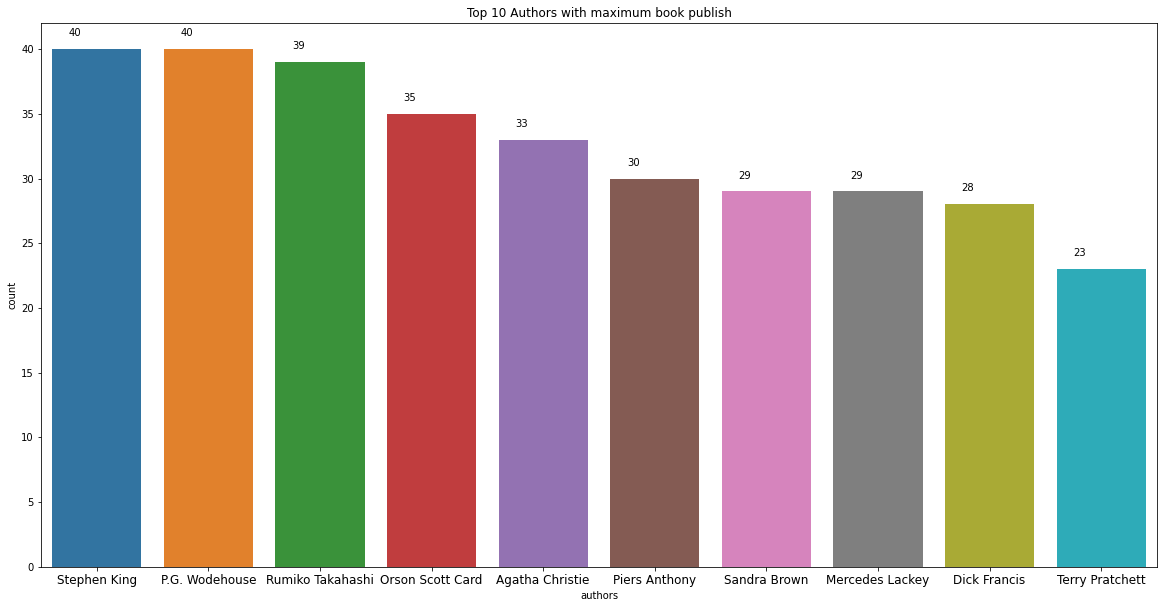

In [28]:
plt.figure(figsize = (20, 10))
ax = sns.countplot(x = 'authors', data =book,
 order = book['authors'].value_counts().iloc[:10].index)
plt.title("Top 10 Authors with maximum book publish")
plt.xticks(fontsize = 12)
for p in ax.patches:
 ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()


 ## Creating Groupby Function base on language_code Column and getting Required Output.

In [ ]:
book.groupby(['language_code'])[['average_rating', 
 'ratings_count', 
'text_reviews_count']].agg('mean').style.background_gradient(cmap = 'Wistia')

## Checking Top 20 Publisher in Dataset




In [ ]:
publisher = book['publisher'].value_counts()[:20]
publisher


## Plotting Barplot for Top 20 Publishers

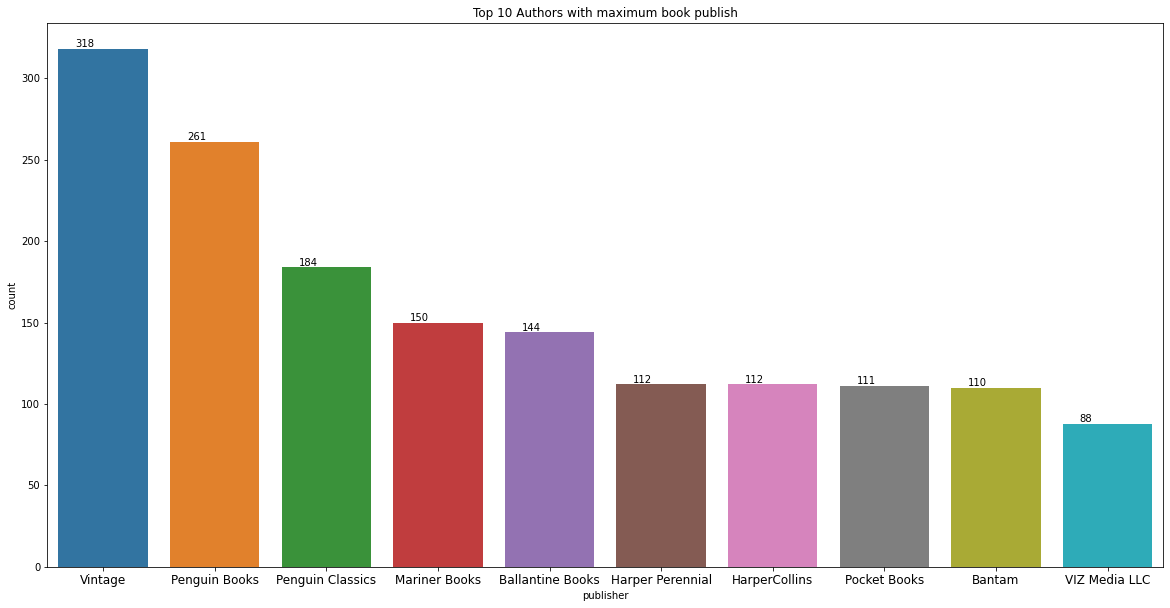

In [29]:
plt.figure(figsize = (20, 10))
ax = sns.countplot(x = 'publisher', data =book,
 order = book['publisher'].value_counts().iloc[:10].index)
plt.title("Top 10 Authors with maximum book publish")
plt.xticks(fontsize = 12)
for p in ax.patches:
 ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

## Plotting Barplot to find most occuring book in our data.

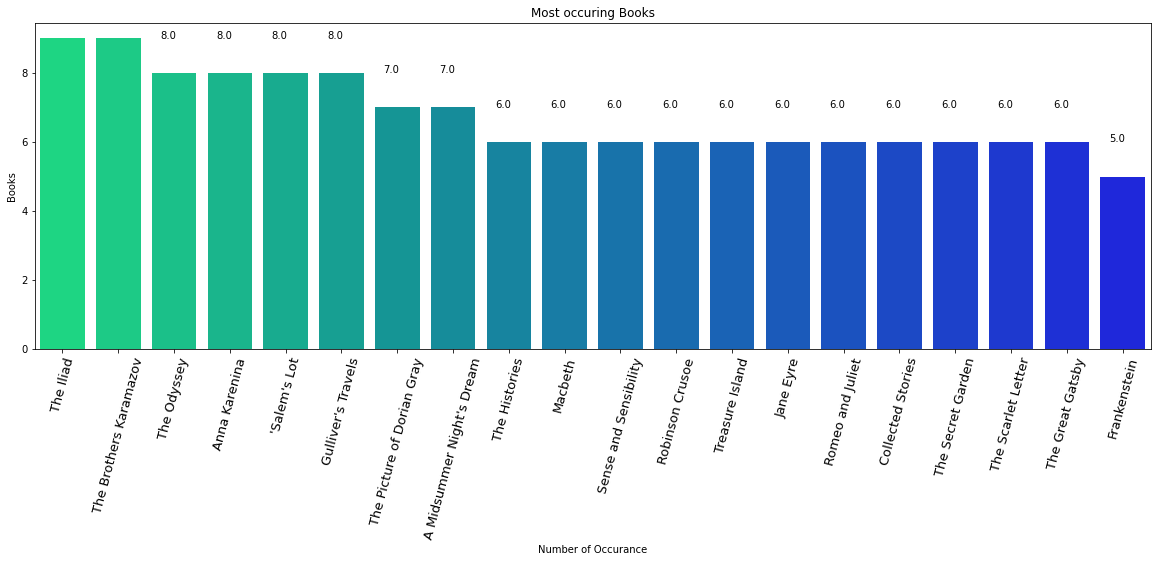

In [30]:
### Plotting BarPLot to find most occuring book in our data
plt.figure(figsize = (20, 6))
book = book['title'].value_counts()[:20]
ax = sns.barplot(x = book.index, y = book,
 palette = 'winter_r')
plt.title("Most occuring Books")
plt.xlabel("Number of Occurance")
plt.ylabel("Books")
plt.xticks(rotation = 75, fontsize = 13)
for p in ax.patches:
 ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()


## Ploting Distribution Graph on Average_Rating

In [31]:
### Ploting Distribution Graph on Average_Rating.
sns.distplot(book['average_rating'])
plt.show()

KeyError: 'average_rating'

## Sorting Dataset related with maximum Average_Rating Column

In [ ]:
book[book.average_rating == book.average_rating.max()][['title','authors','language_code','publisher']]


## Recommending Books based on Publishers

## Defining Function for Recommending Books based on Publishers


In [32]:
def recomd_books_publisheres(x):
 a = book[book['publisher'] == x][['title', 'average_rating']]
 a = a.sort_values(by = 'average_rating', ascending = False)
 return a.head(10)


In [33]:
### Checking Function of Recommending Books based on Publishers name "Vintage"
recomd_books_publisheres('Vintage')

KeyError: 'publisher'